In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'OLI.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

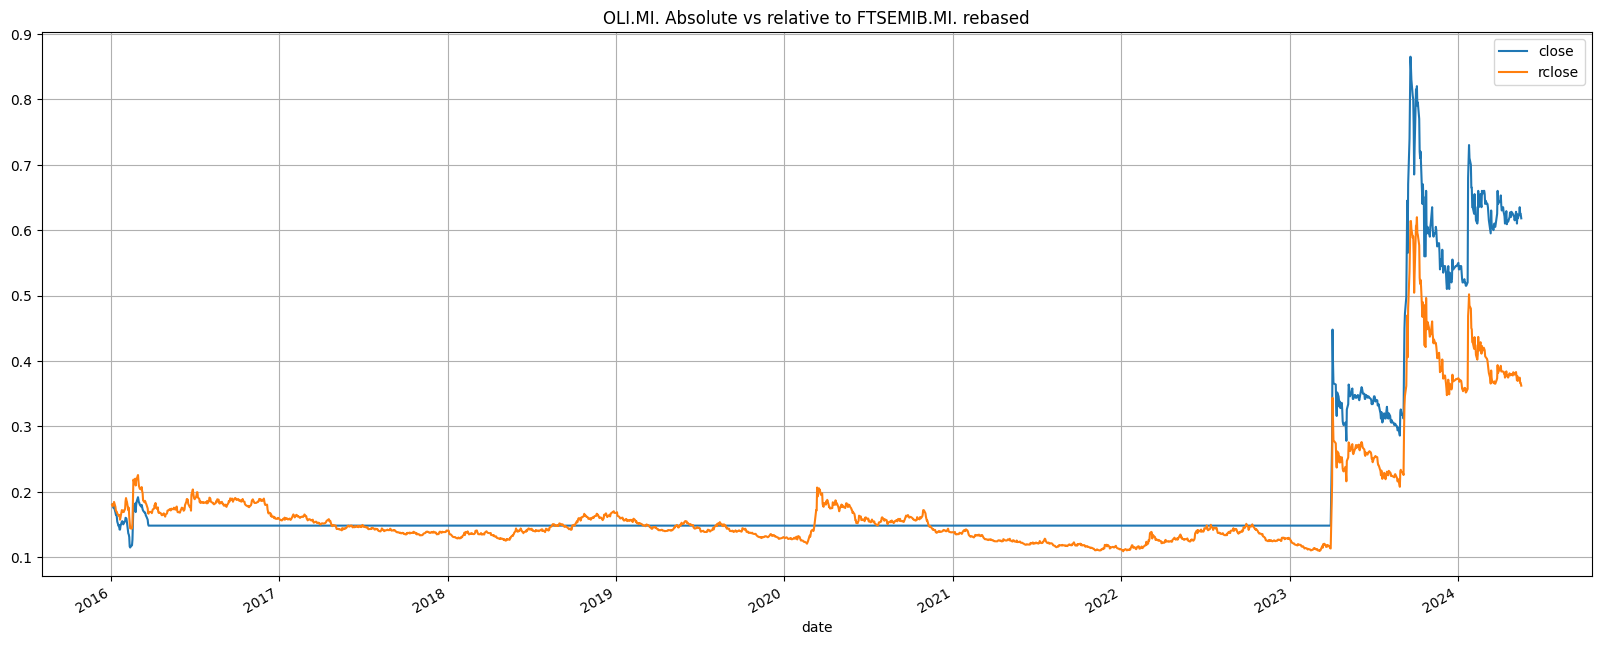

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

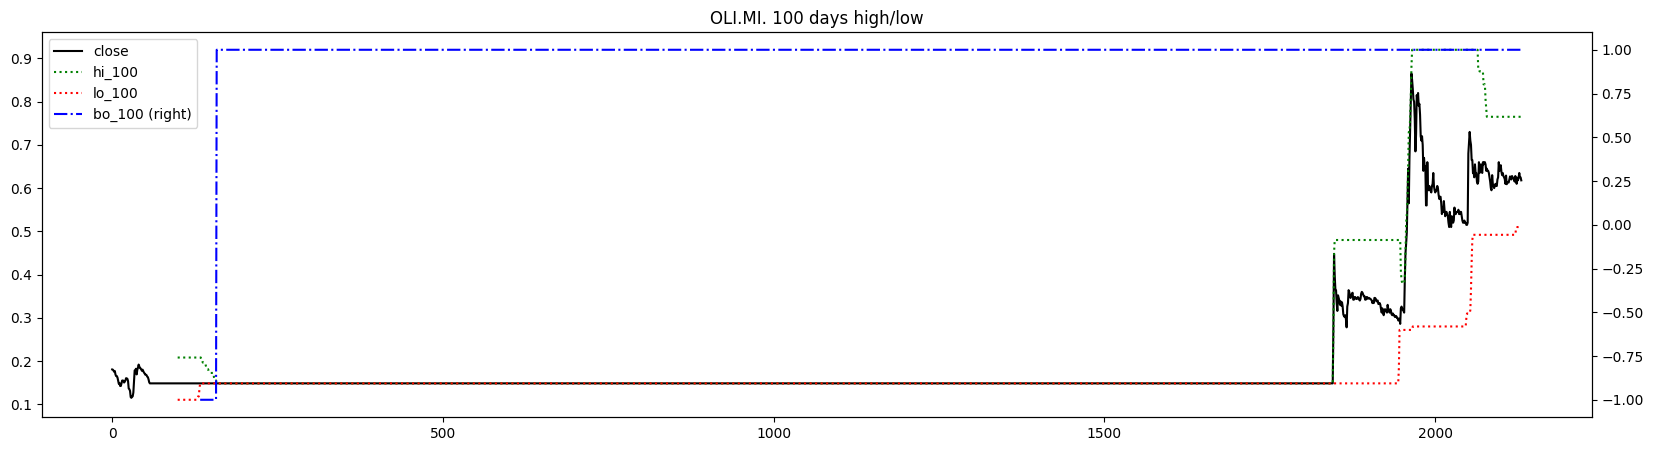

In [4]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

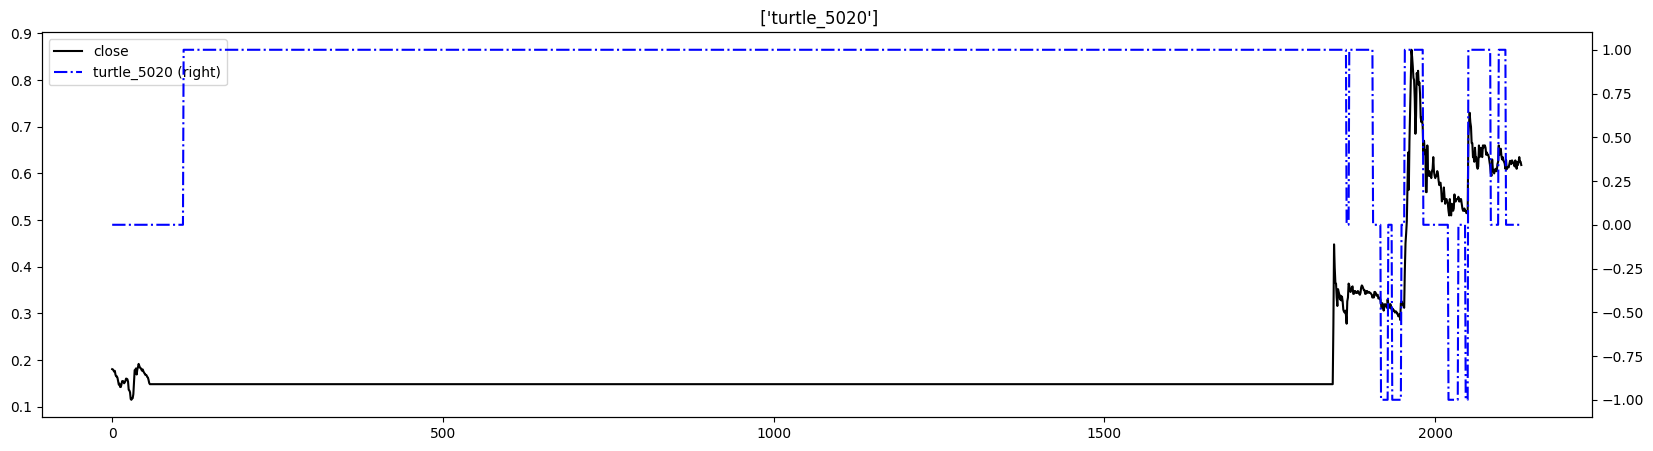

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

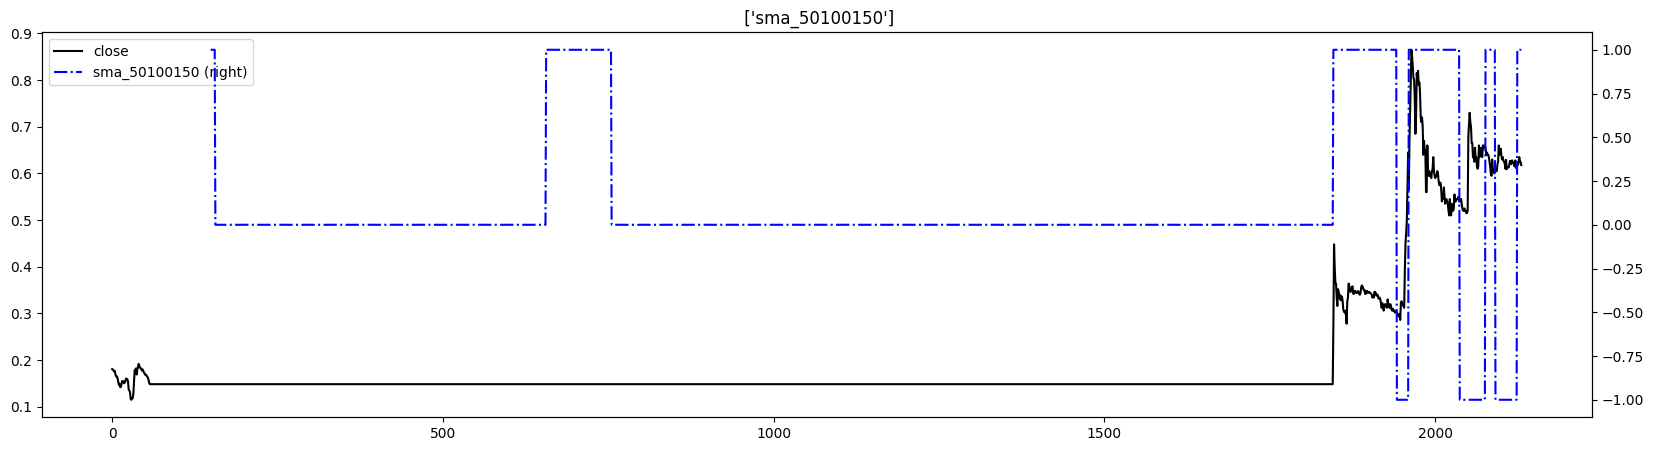

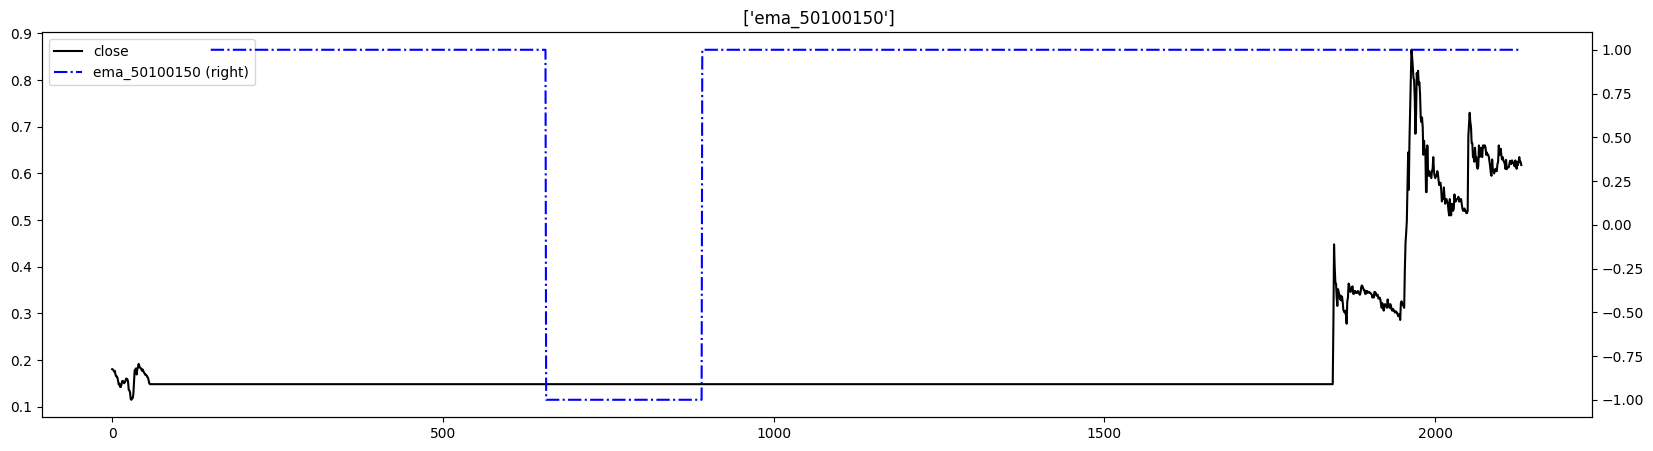

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

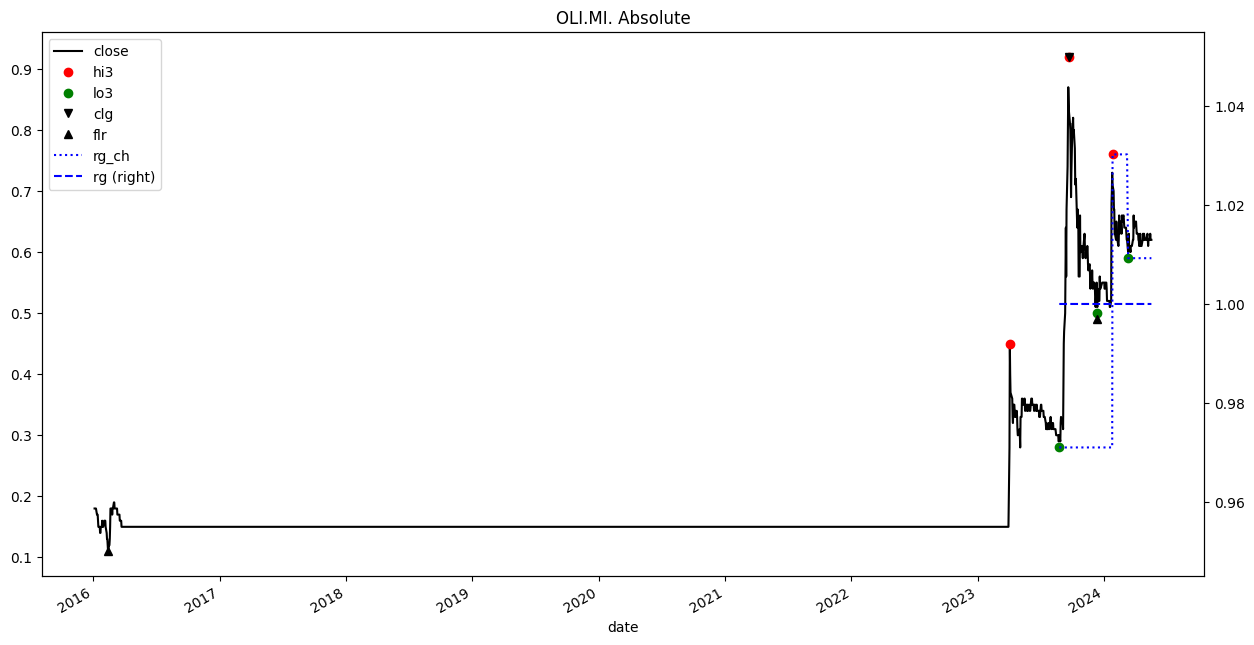

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


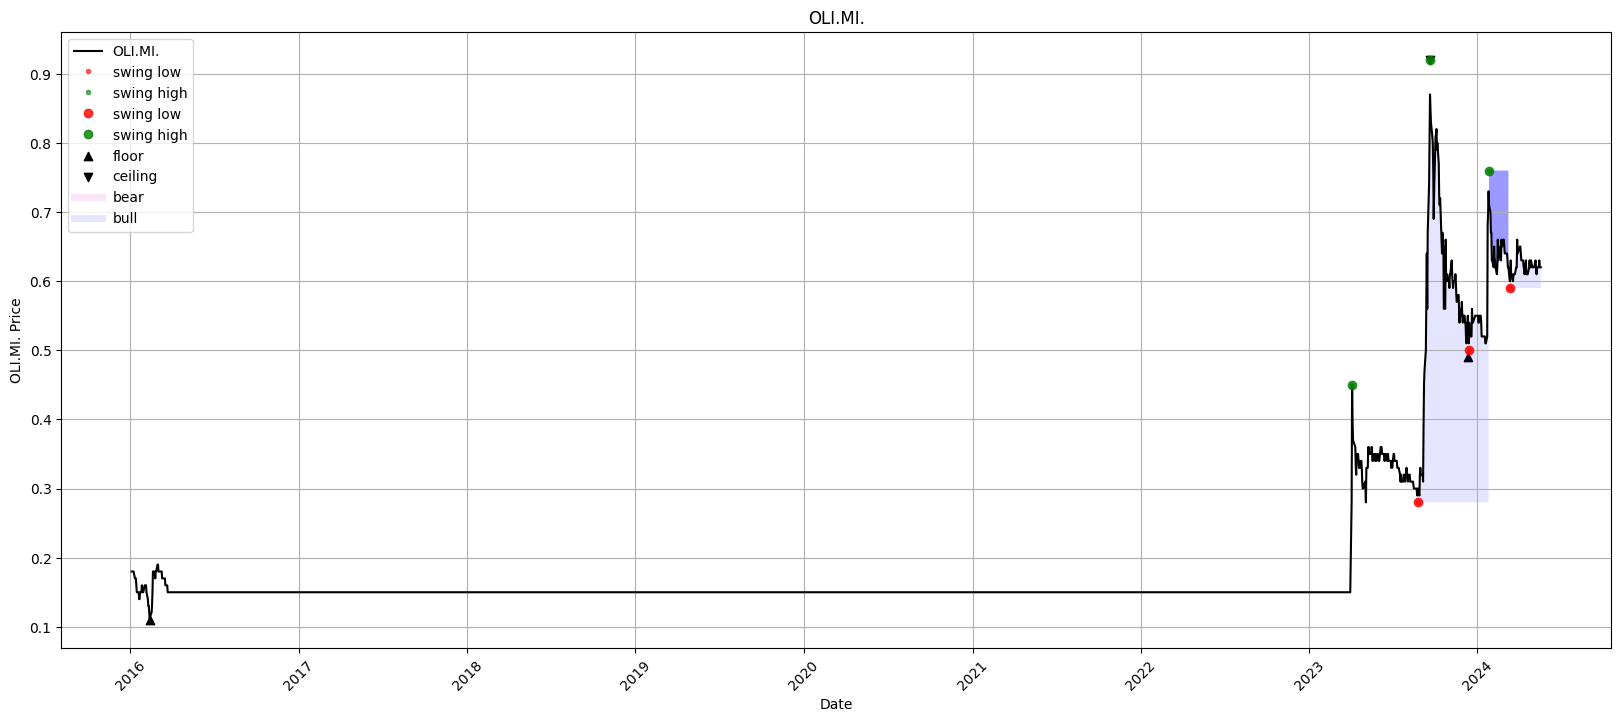

In [8]:
plot_regime_abs(df_fc, ticker)

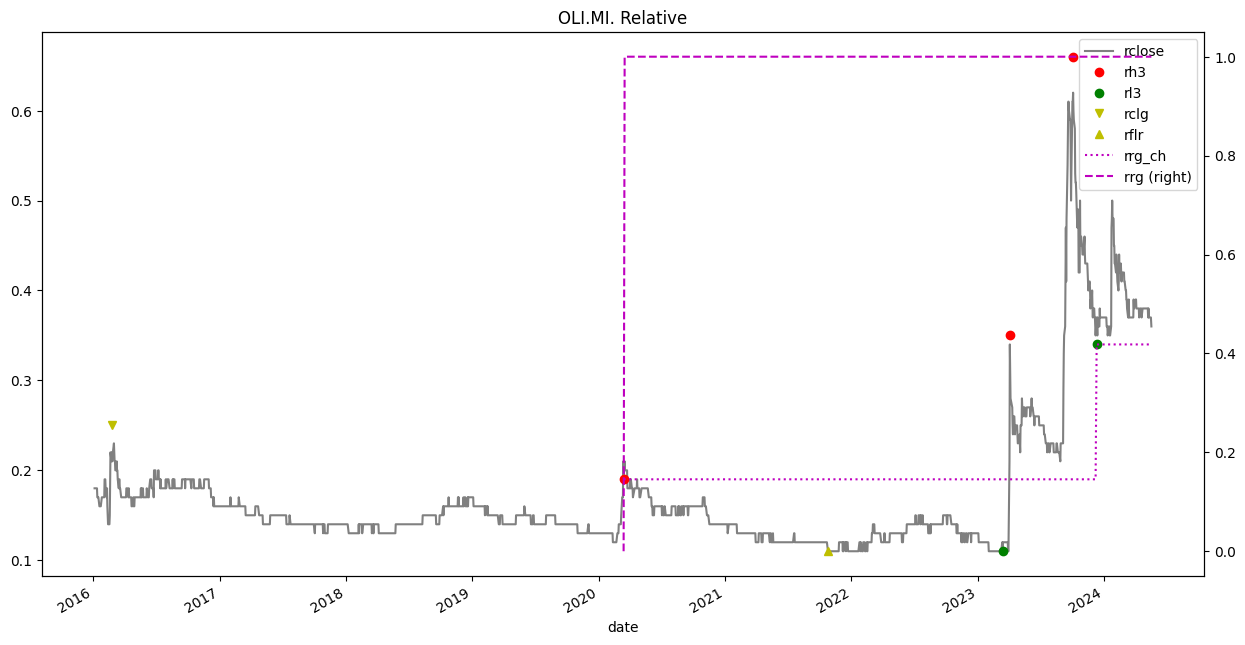

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


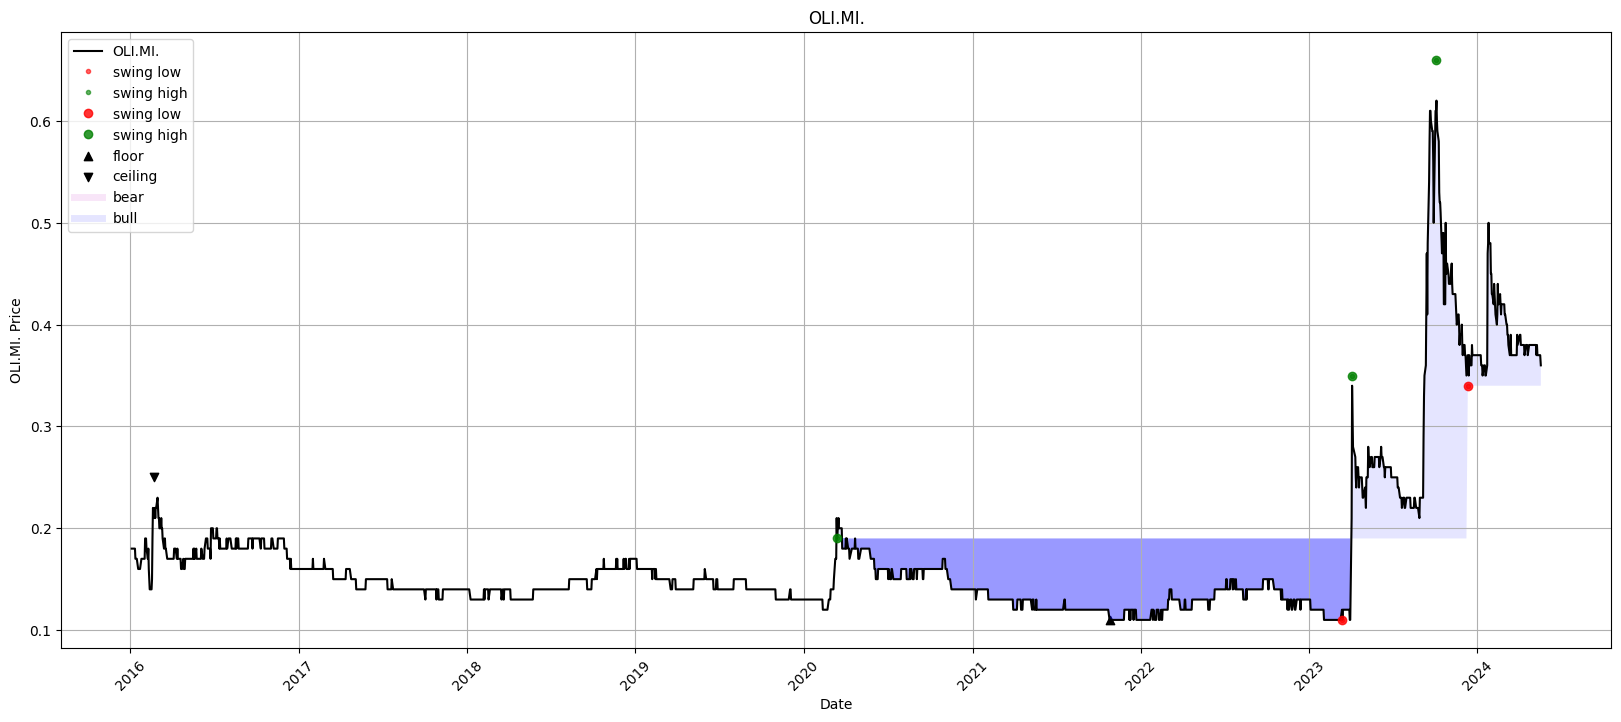

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

,close,stop_loss,tt_cumul
method,,,
breakout,0.618,0.608,3.164505
ema,0.618,0.608,3.164505
floor_ceiling,0.620,0.610,1.066667
floor_ceiling_relative,0.620,0.610,3.133333
sma,0.618,0.608,-0.589965
turtle,0.618,0.600,0.638761


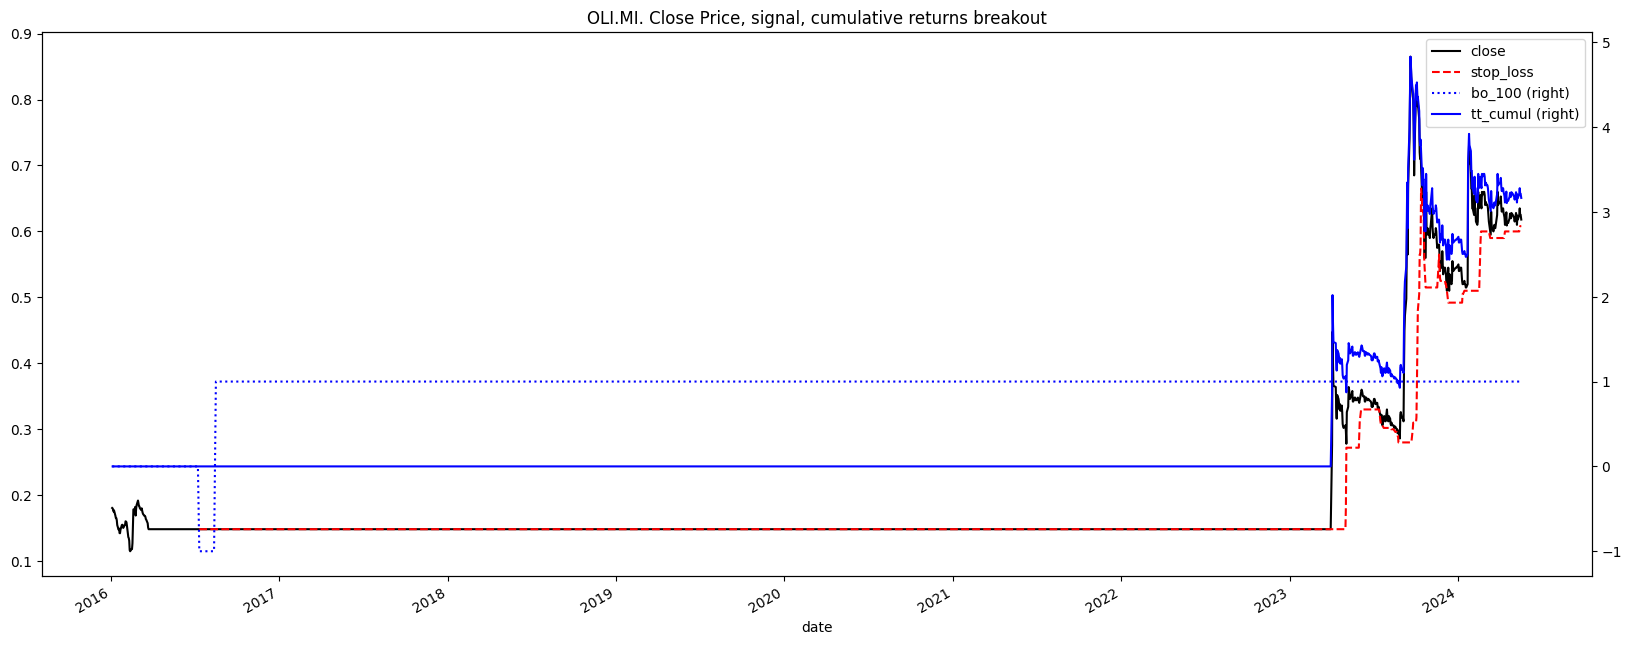

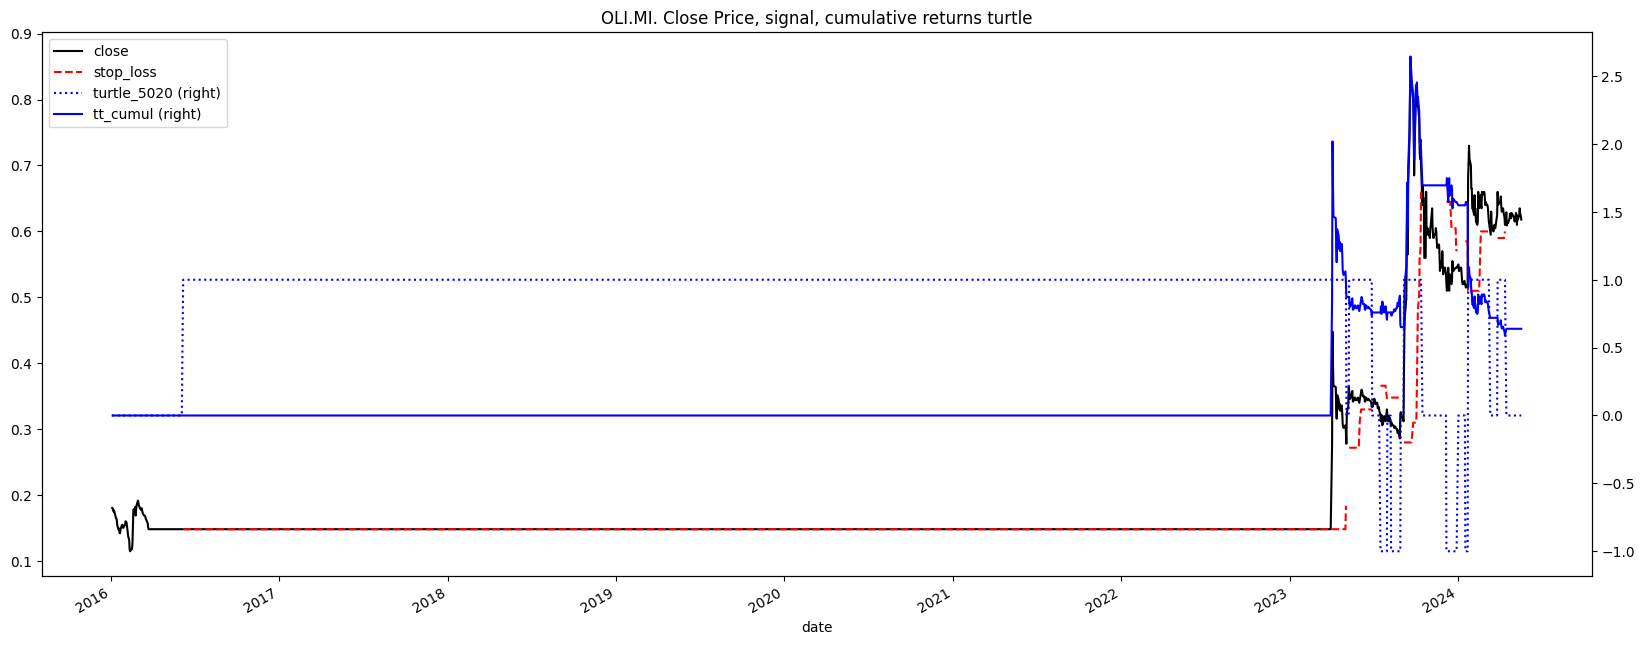

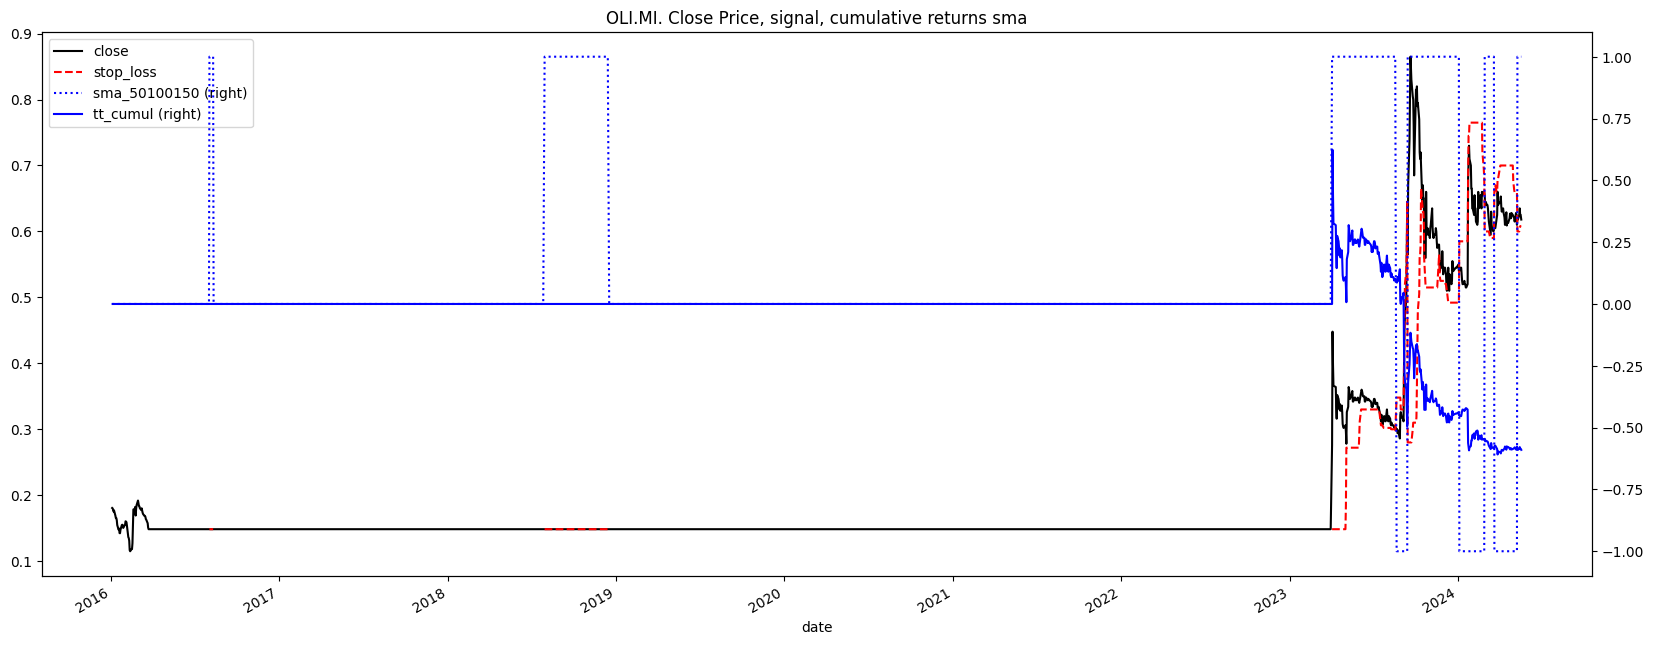

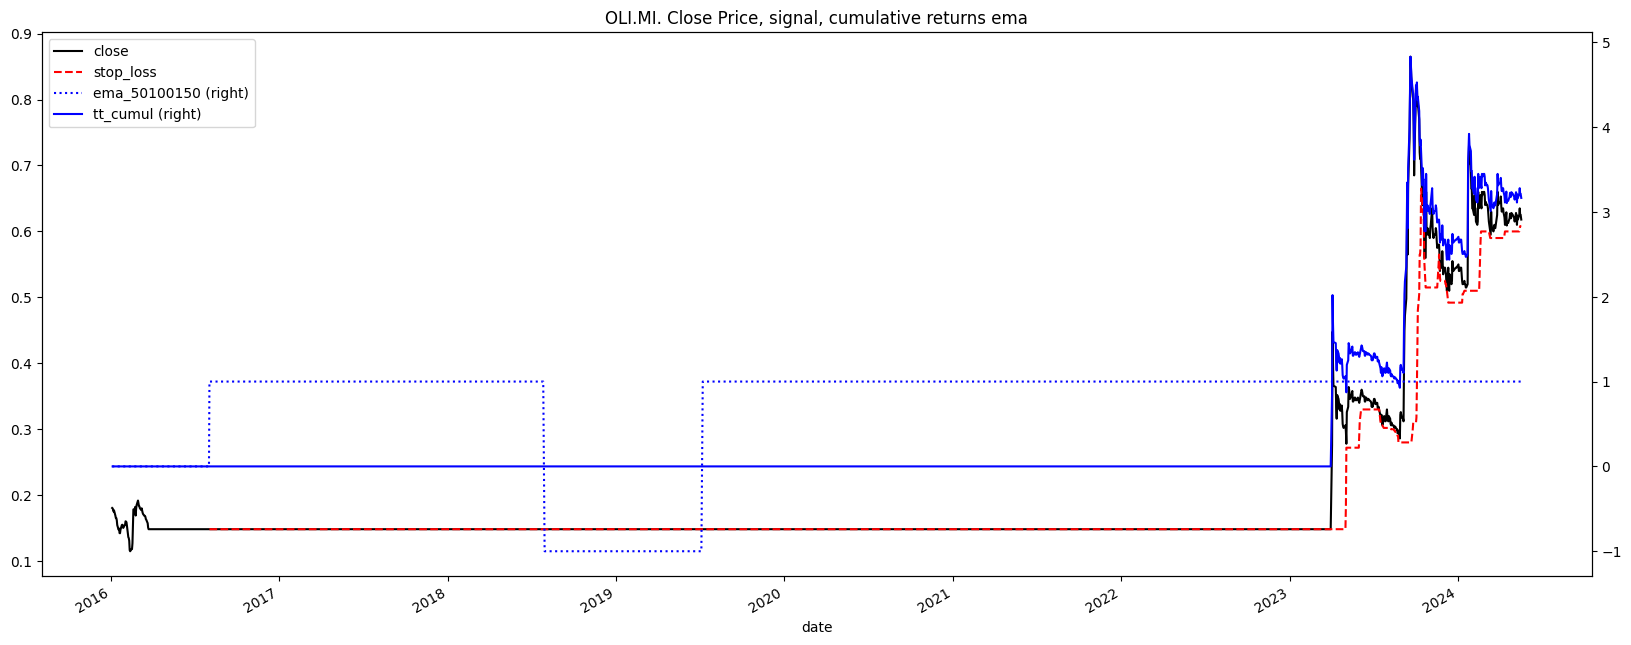

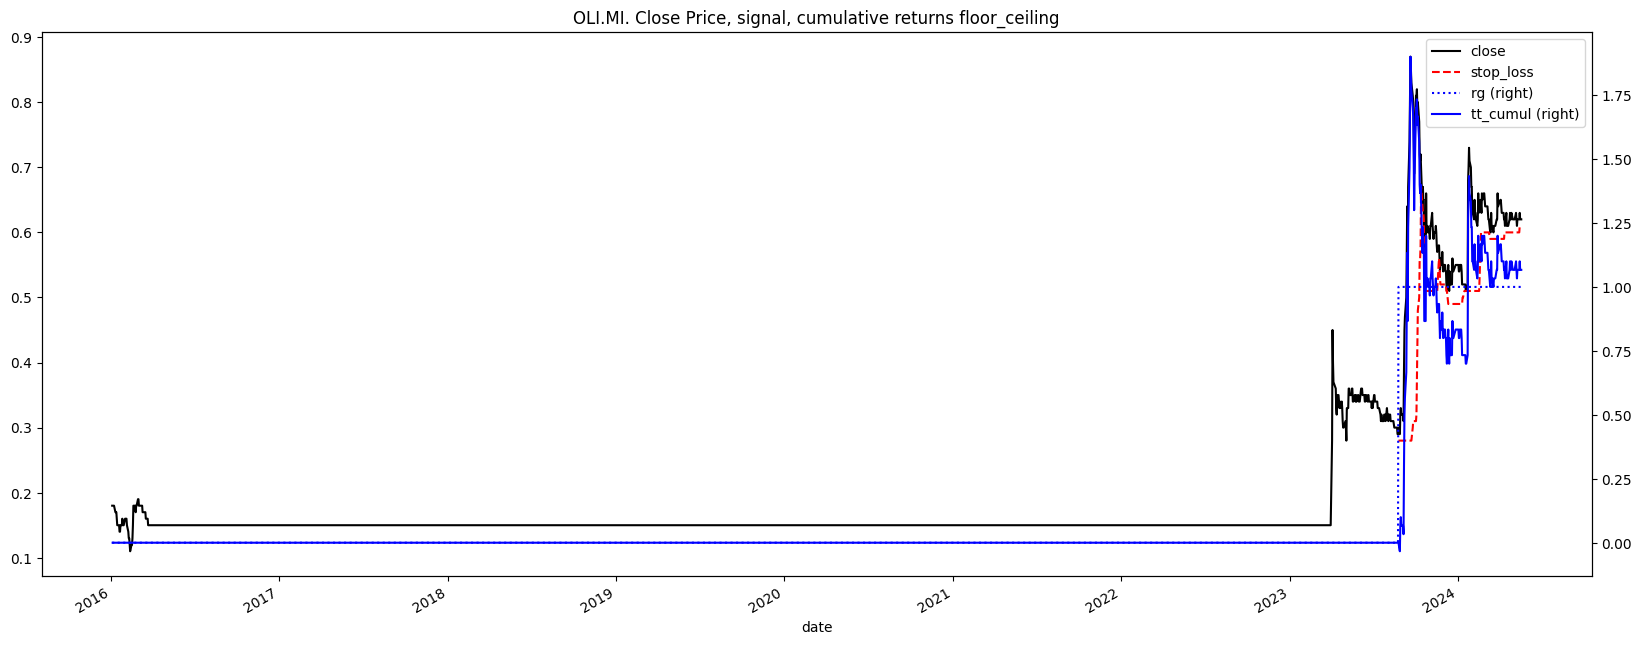

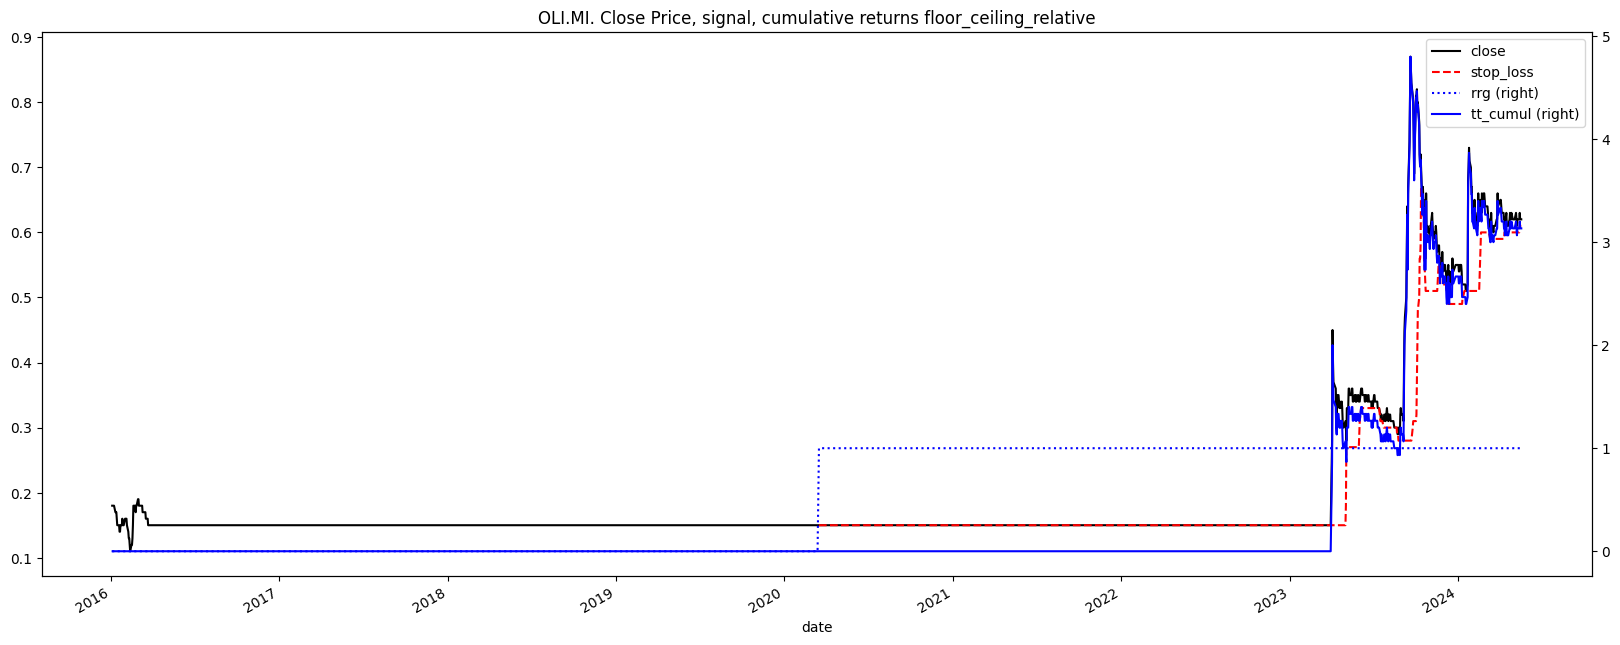

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

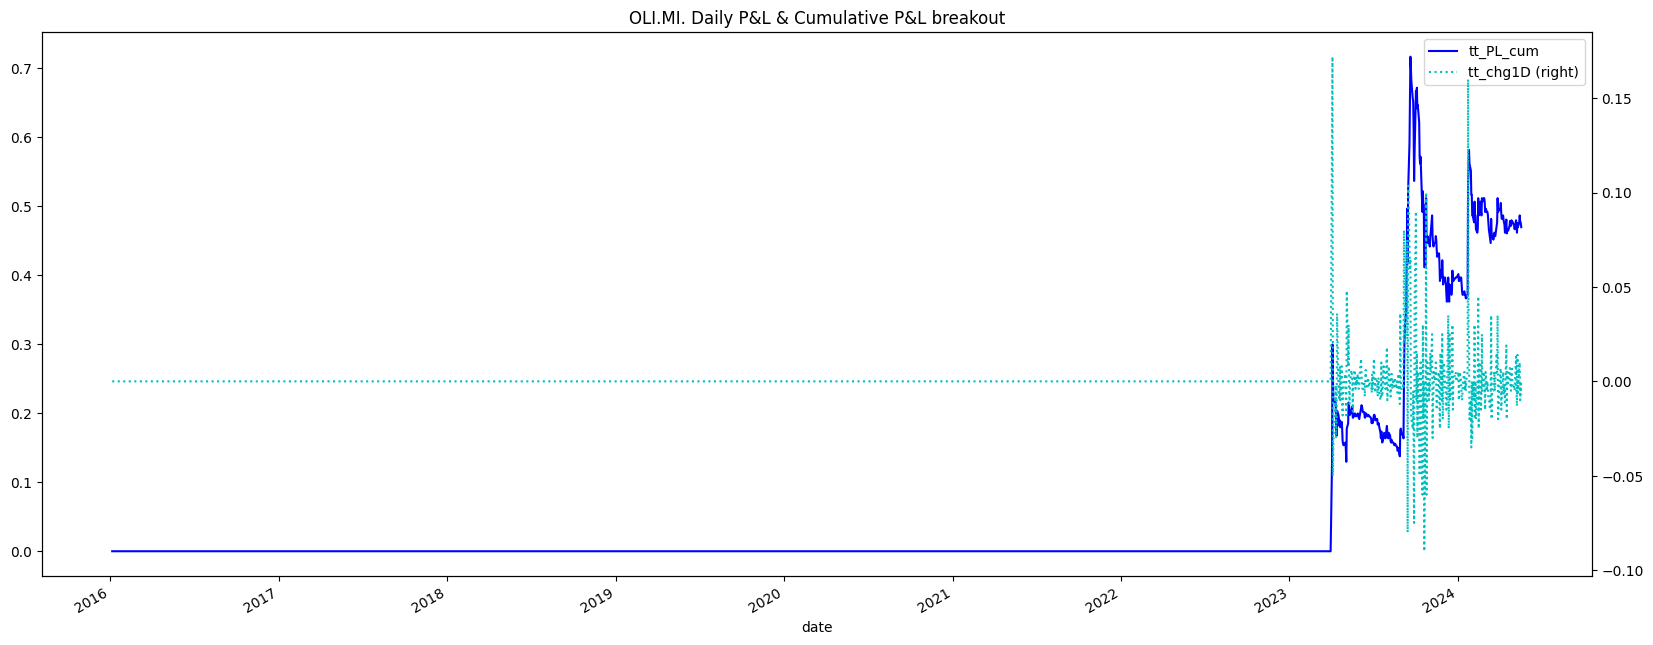

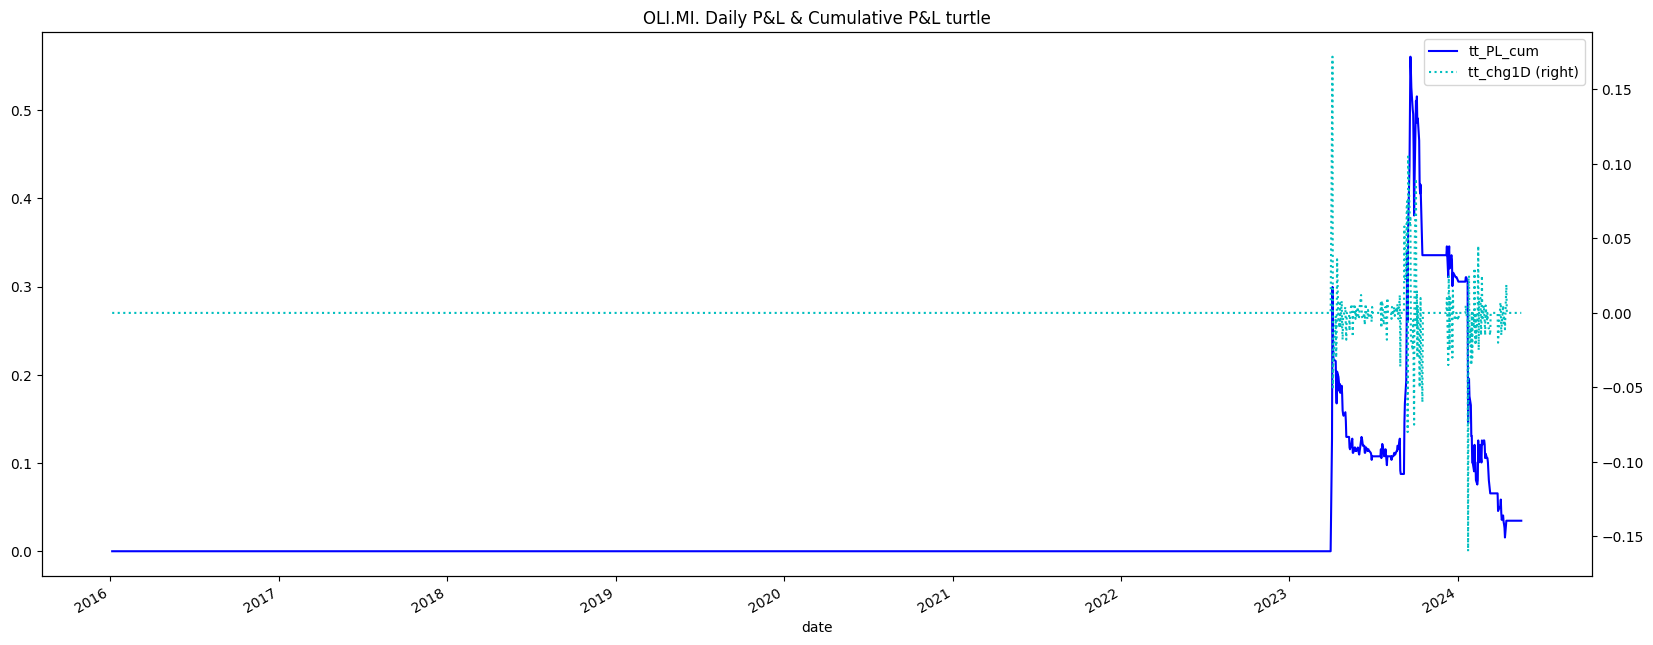

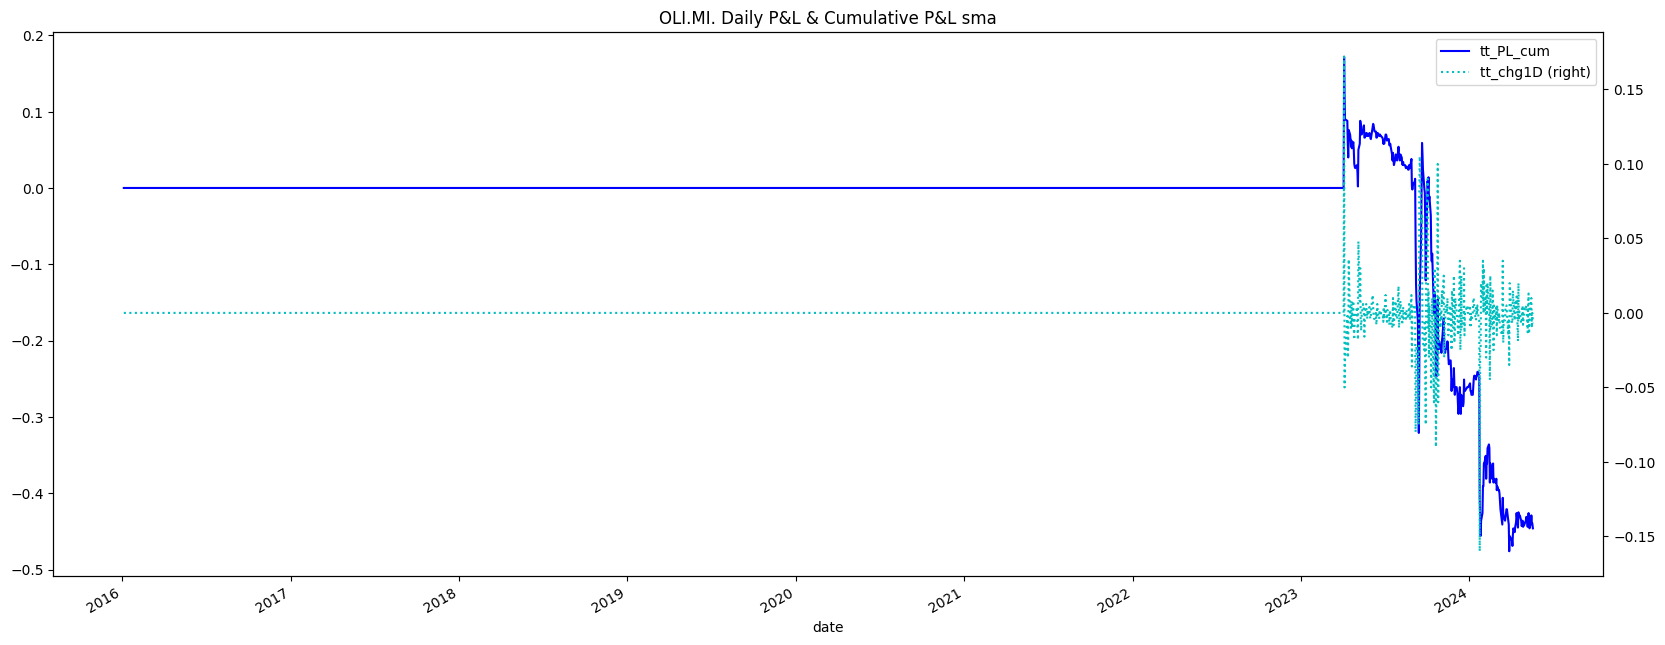

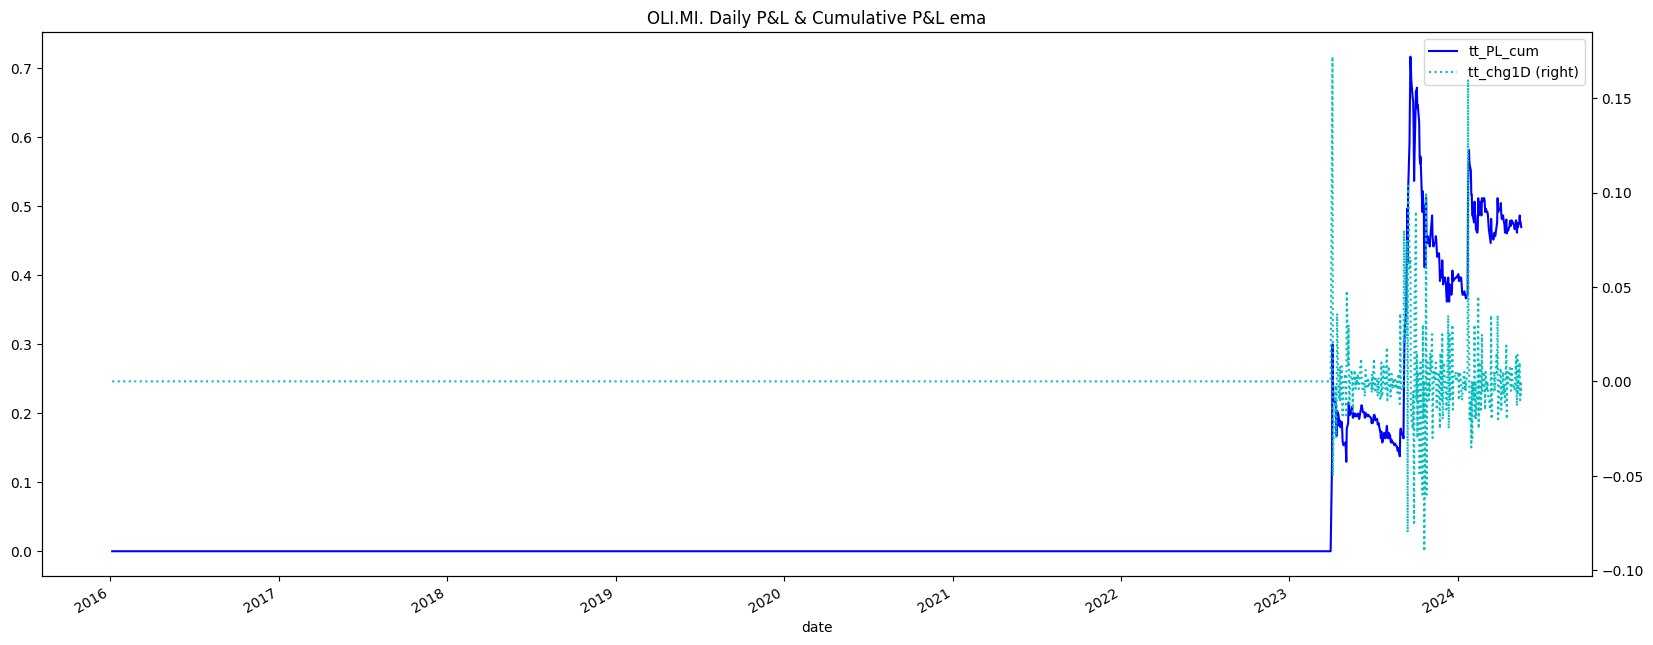

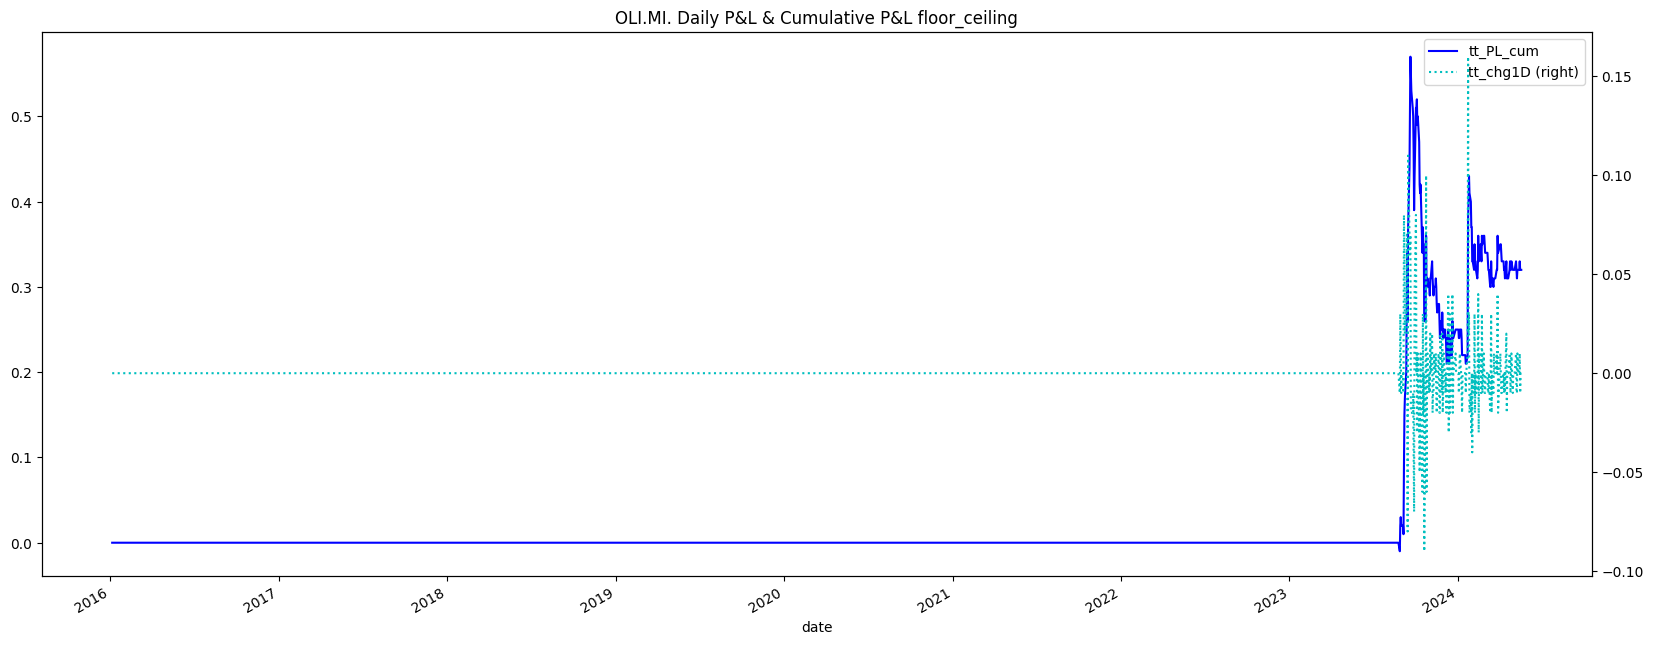

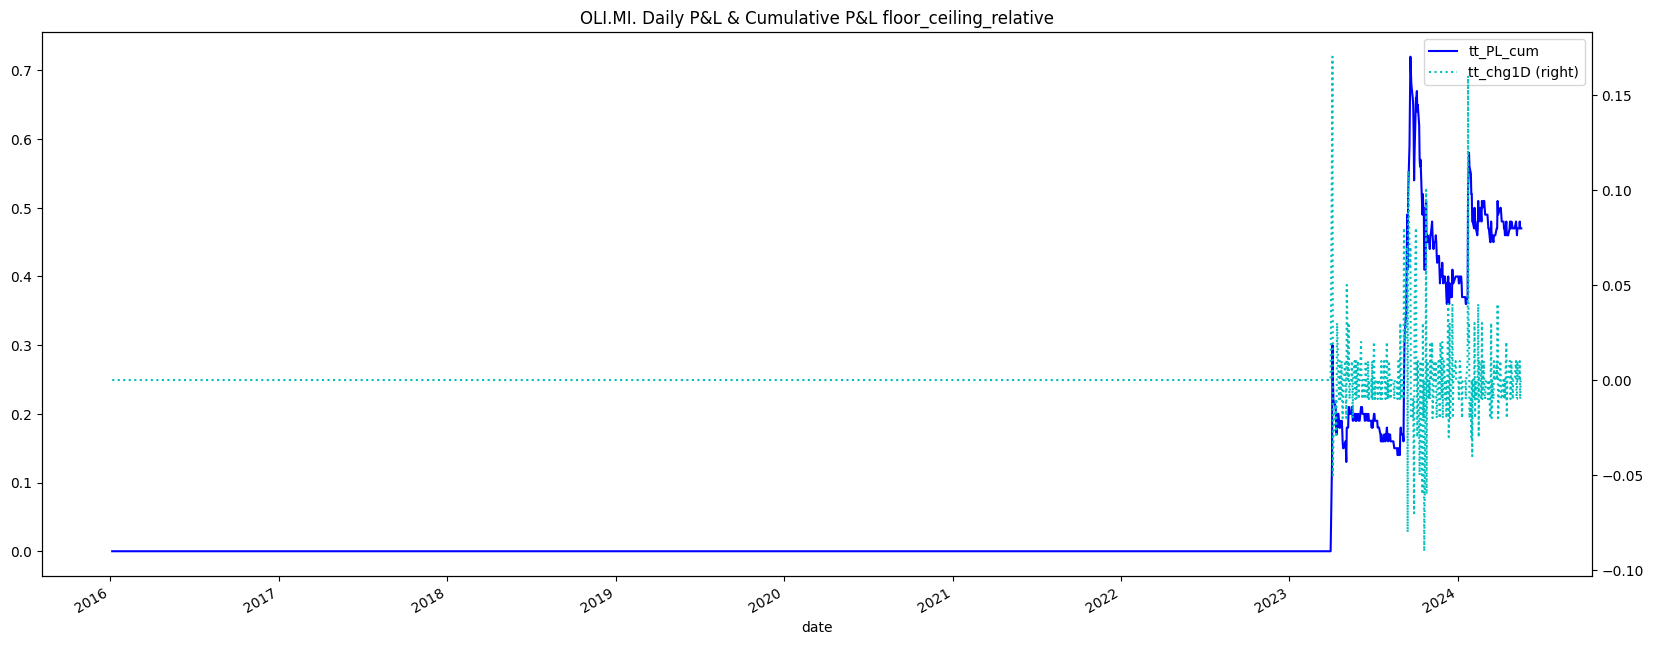

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

,trading_edge,geometric_expectancy,kelly
method,,,
breakout,0.000675,0.000637,9.114753
ema,0.000675,0.000637,9.114753
floor_ceiling,0.003359,0.003327,48.653876
floor_ceiling_relative,0.003359,0.003327,48.653876
sma,0.000243,0.000207,3.361158
turtle,0.000020,0.000006,0.714496


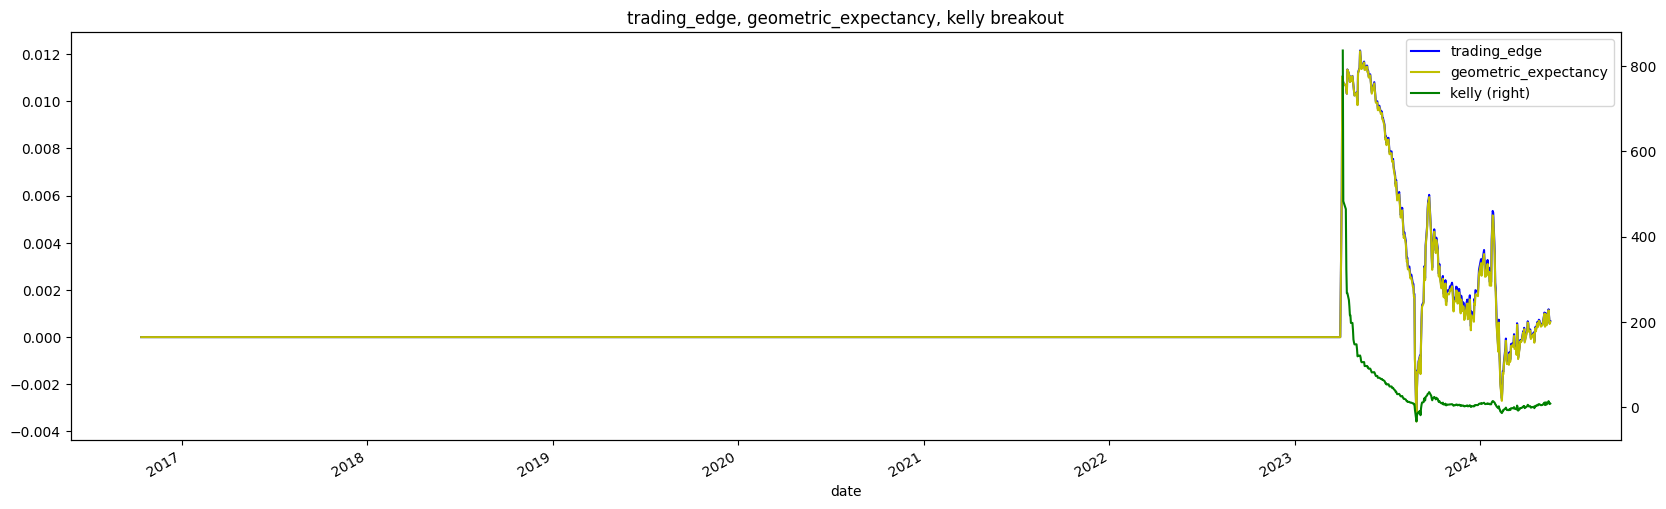

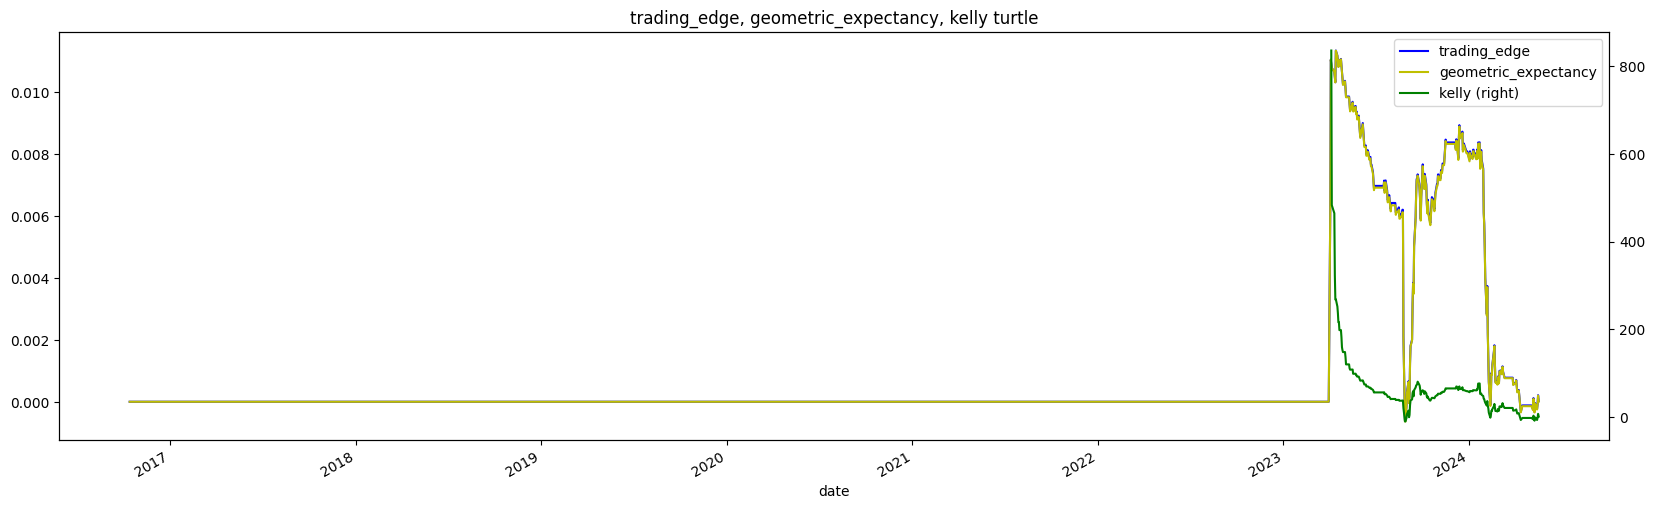

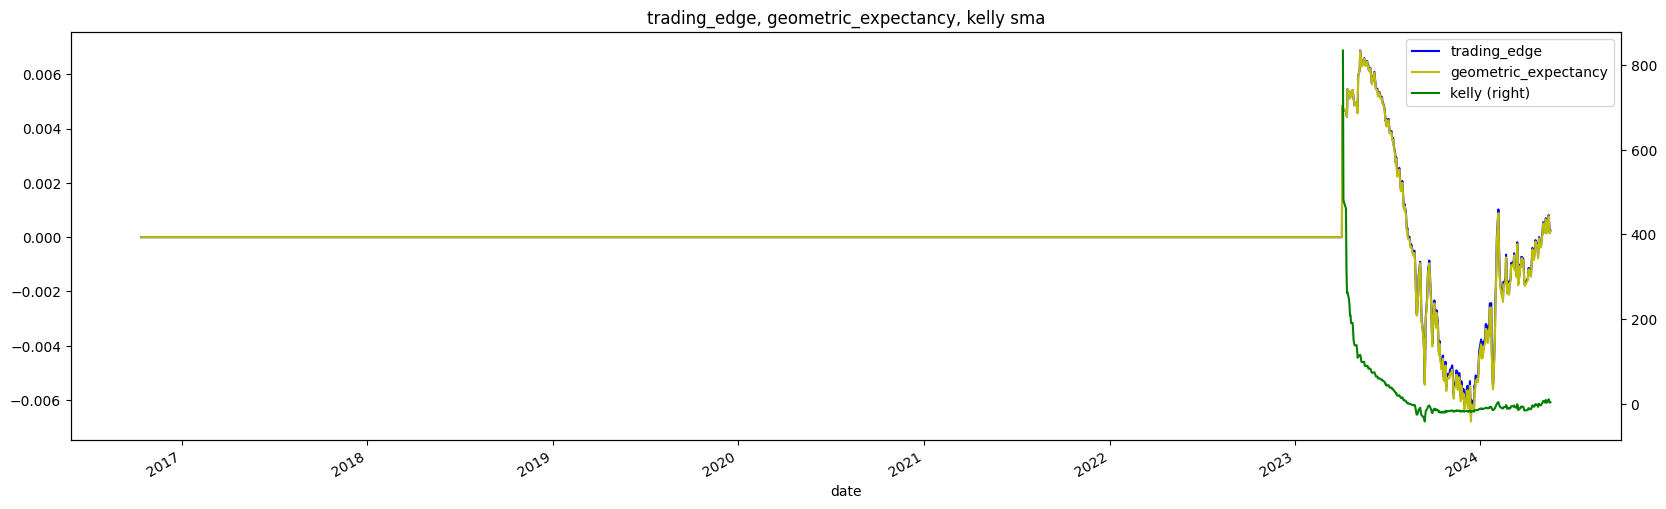

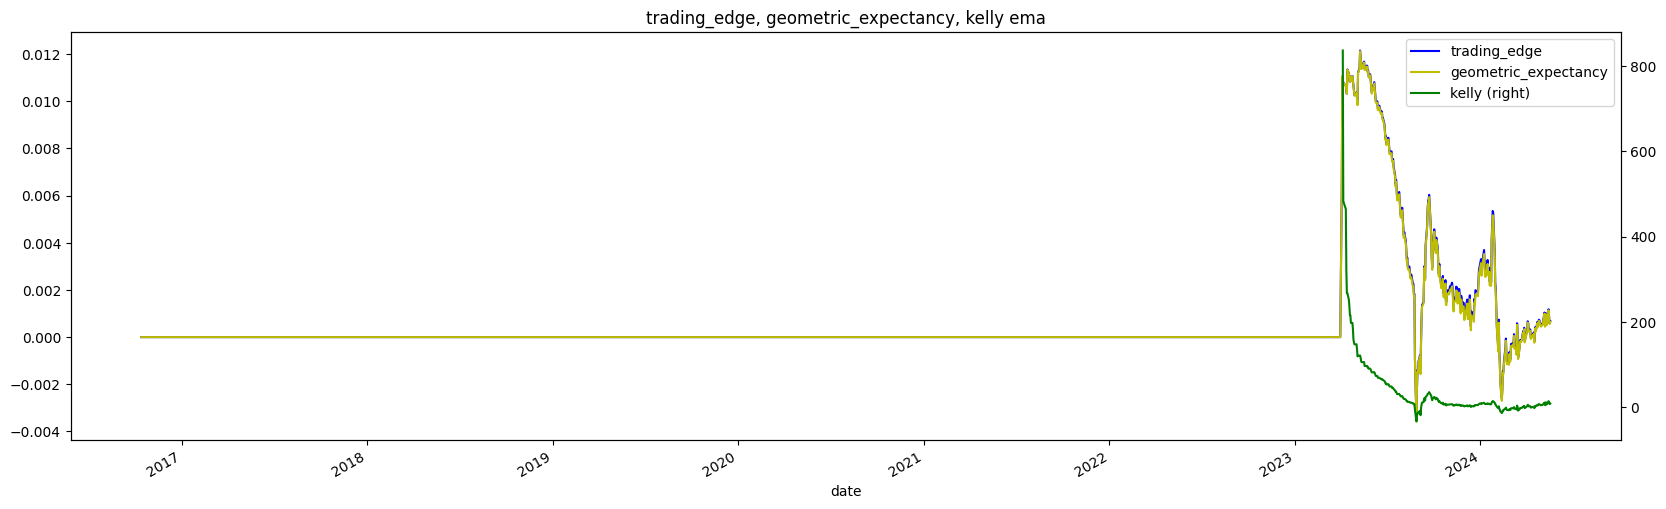

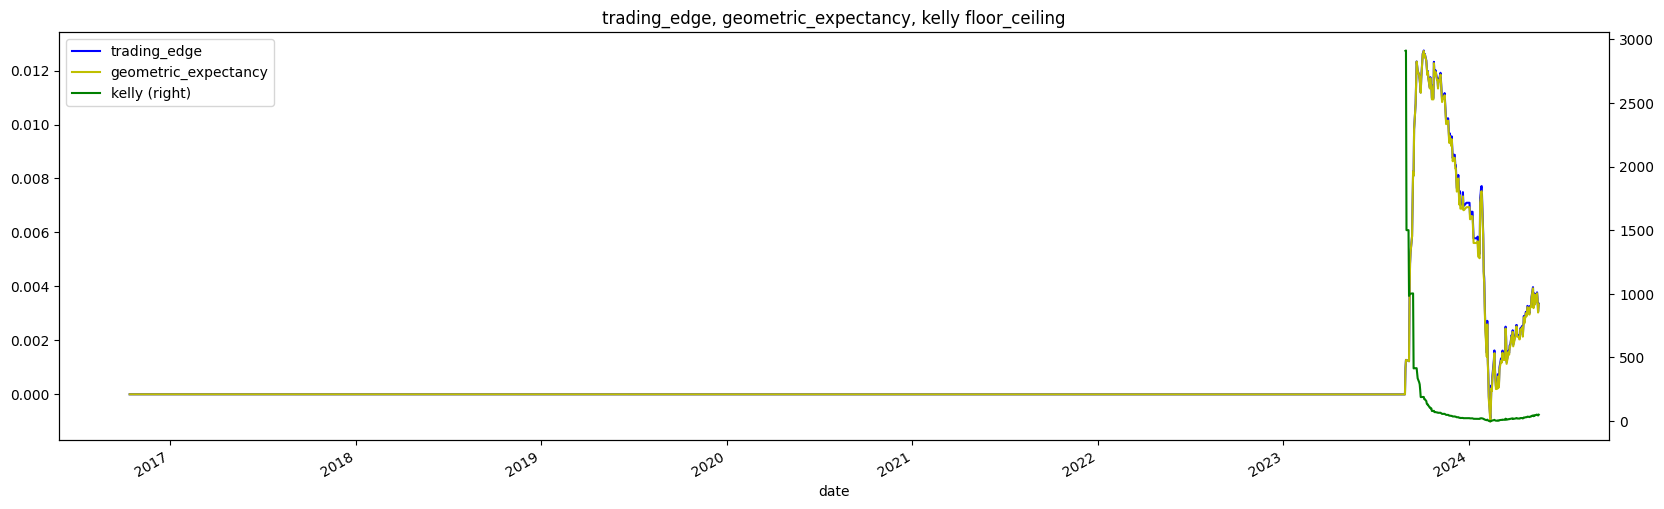

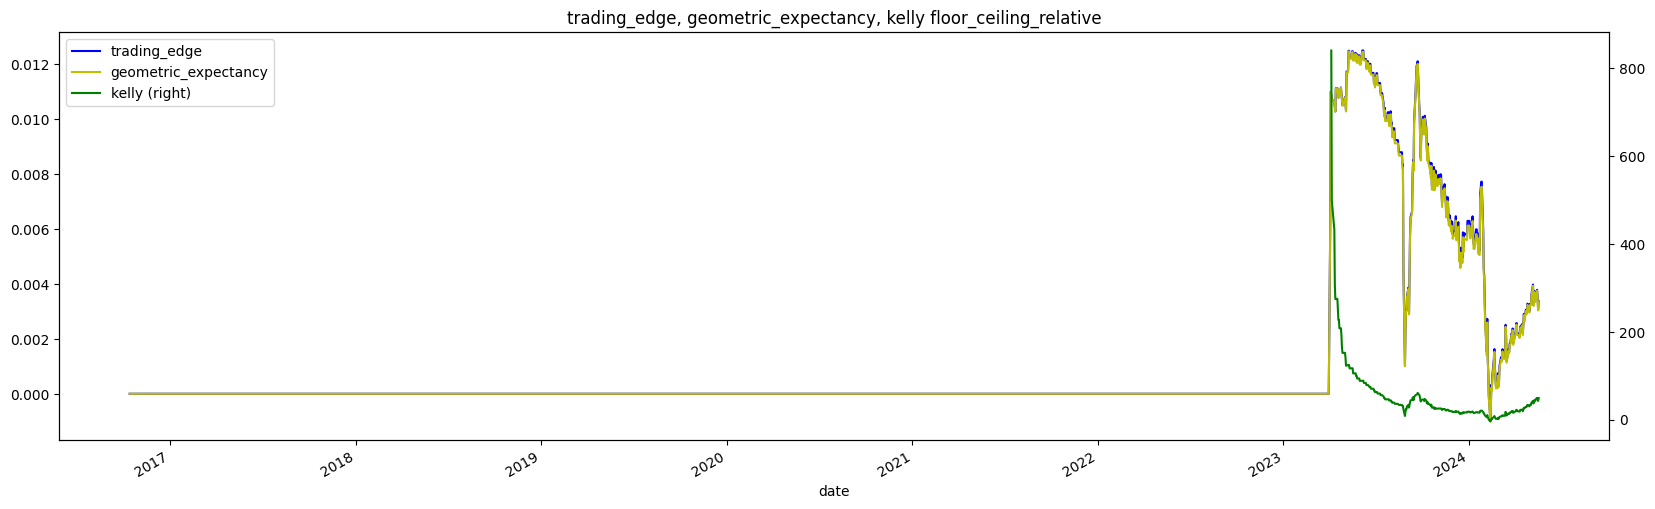

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

,constant,concave,convex,equal_weight,tt_PL_cum_fx
method,,,,,
breakout,100000.000000,100000.000000,100000.000000,115778.659868,0.469603
ema,100000.000000,100000.000000,100000.000000,115778.659868,0.469603
floor_ceiling,108000.000000,112000.000000,112000.000000,105312.000000,0.320000
floor_ceiling_relative,100000.000000,100000.000000,100000.000000,115651.000000,0.470000
sma,98260.600427,97413.200635,97413.200635,91927.401981,-0.446000
turtle,102974.700096,104423.400131,103771.700060,103977.659747,0.034603


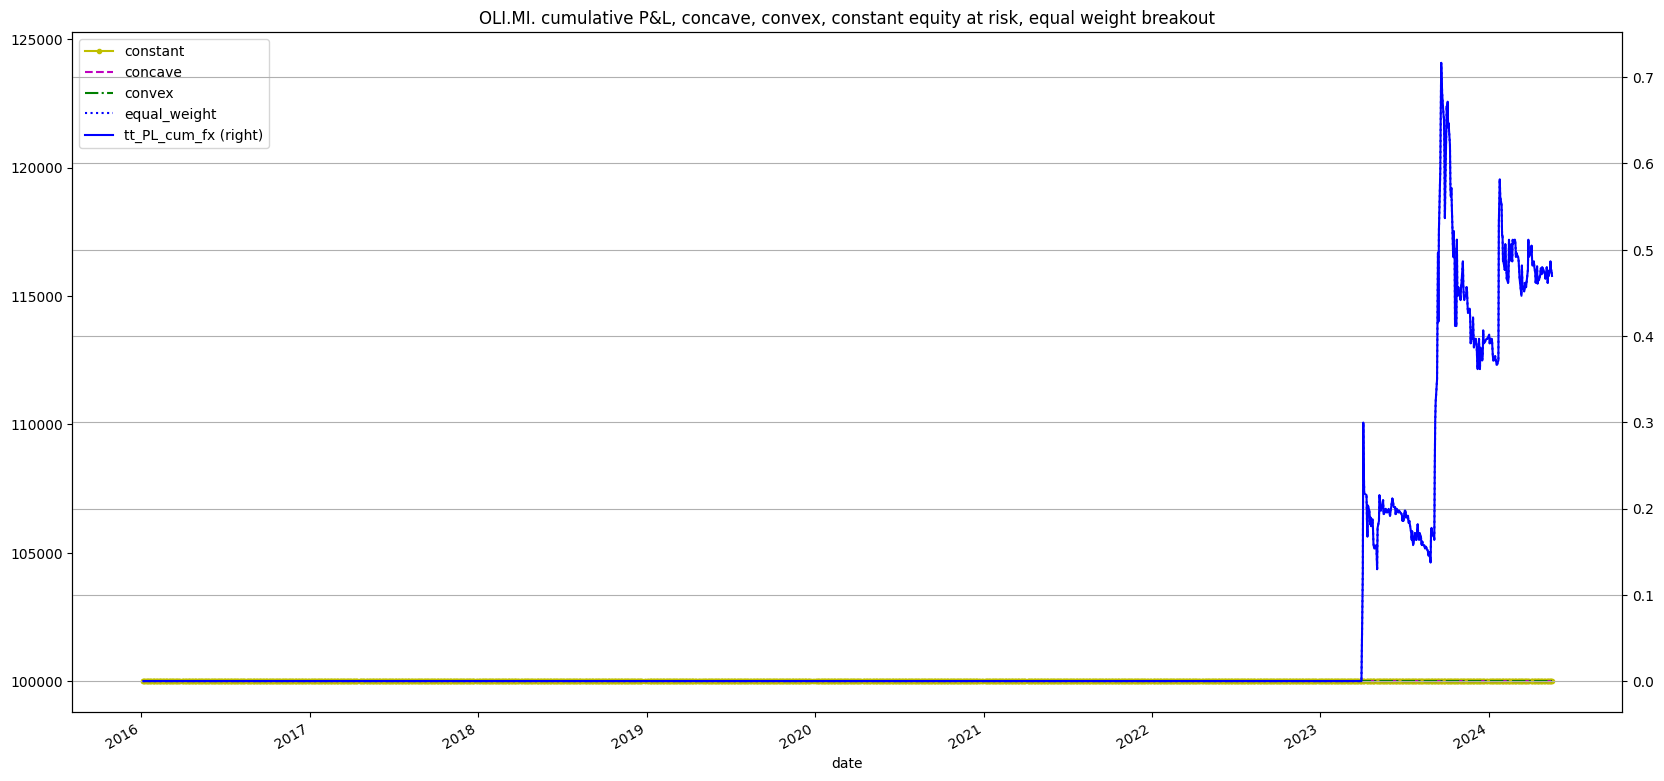

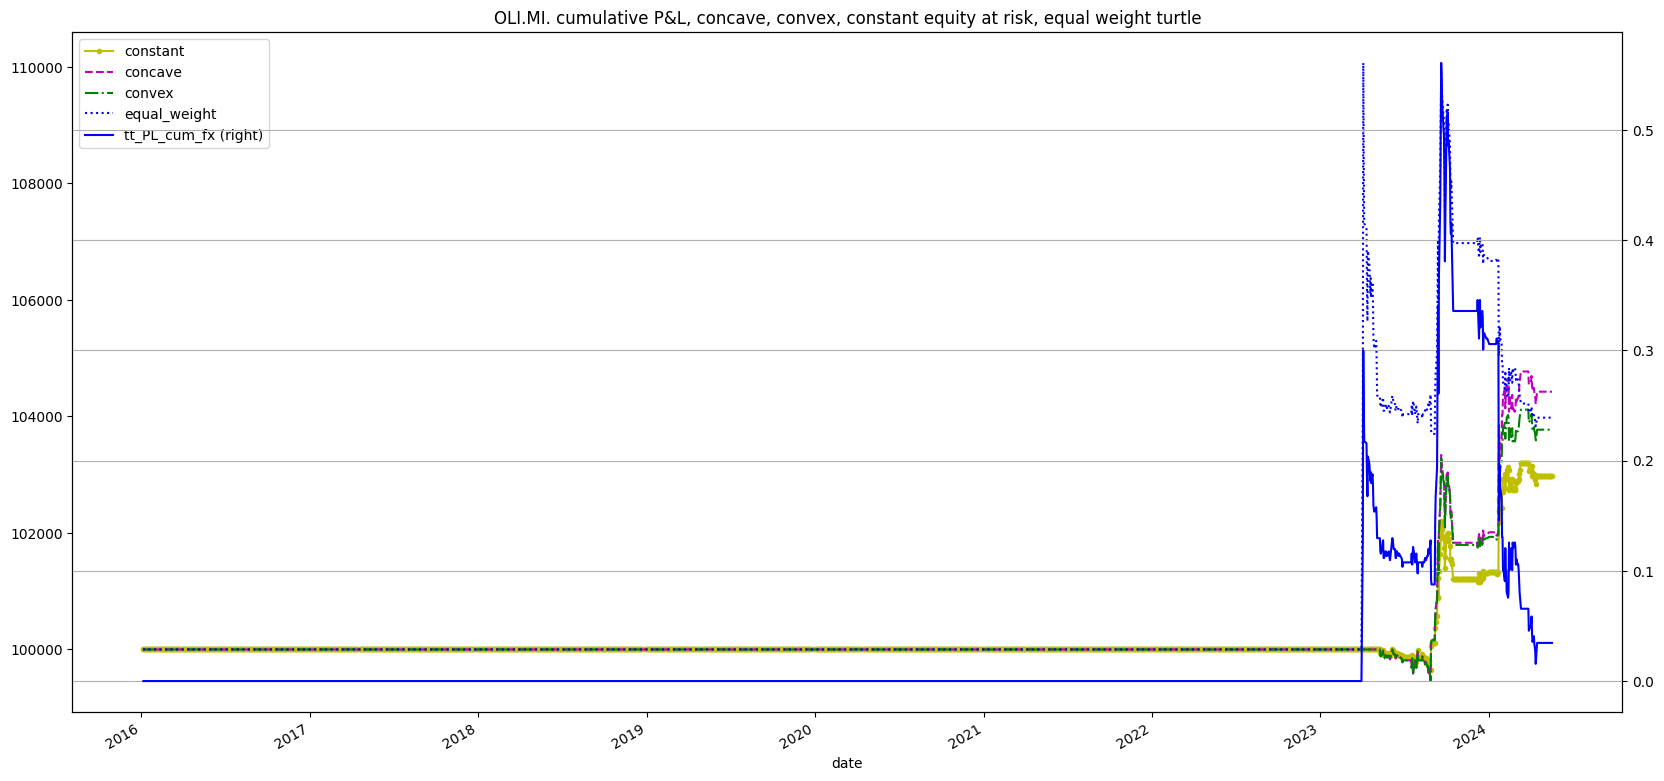

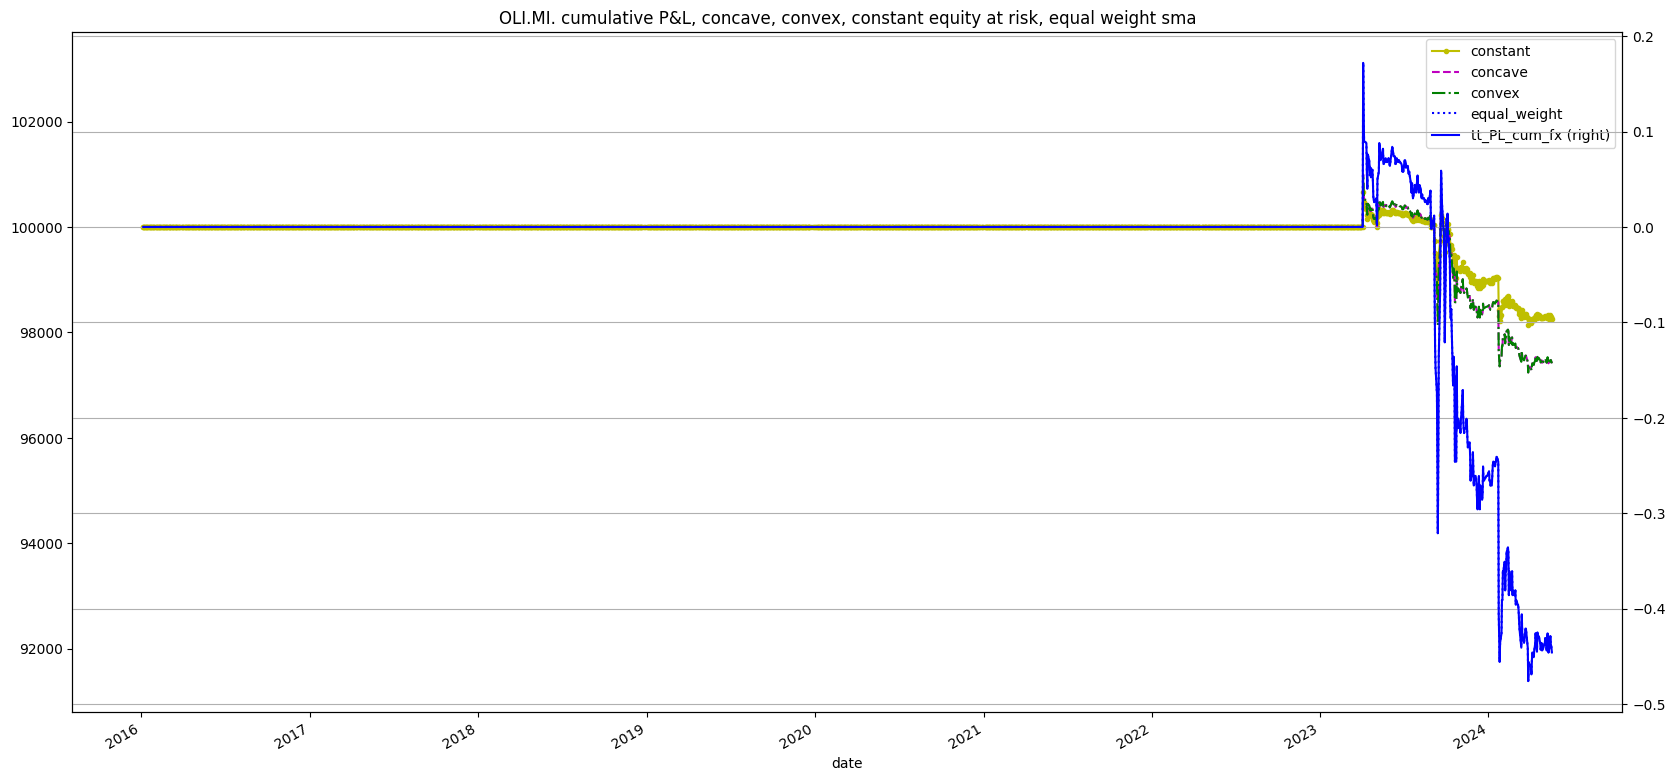

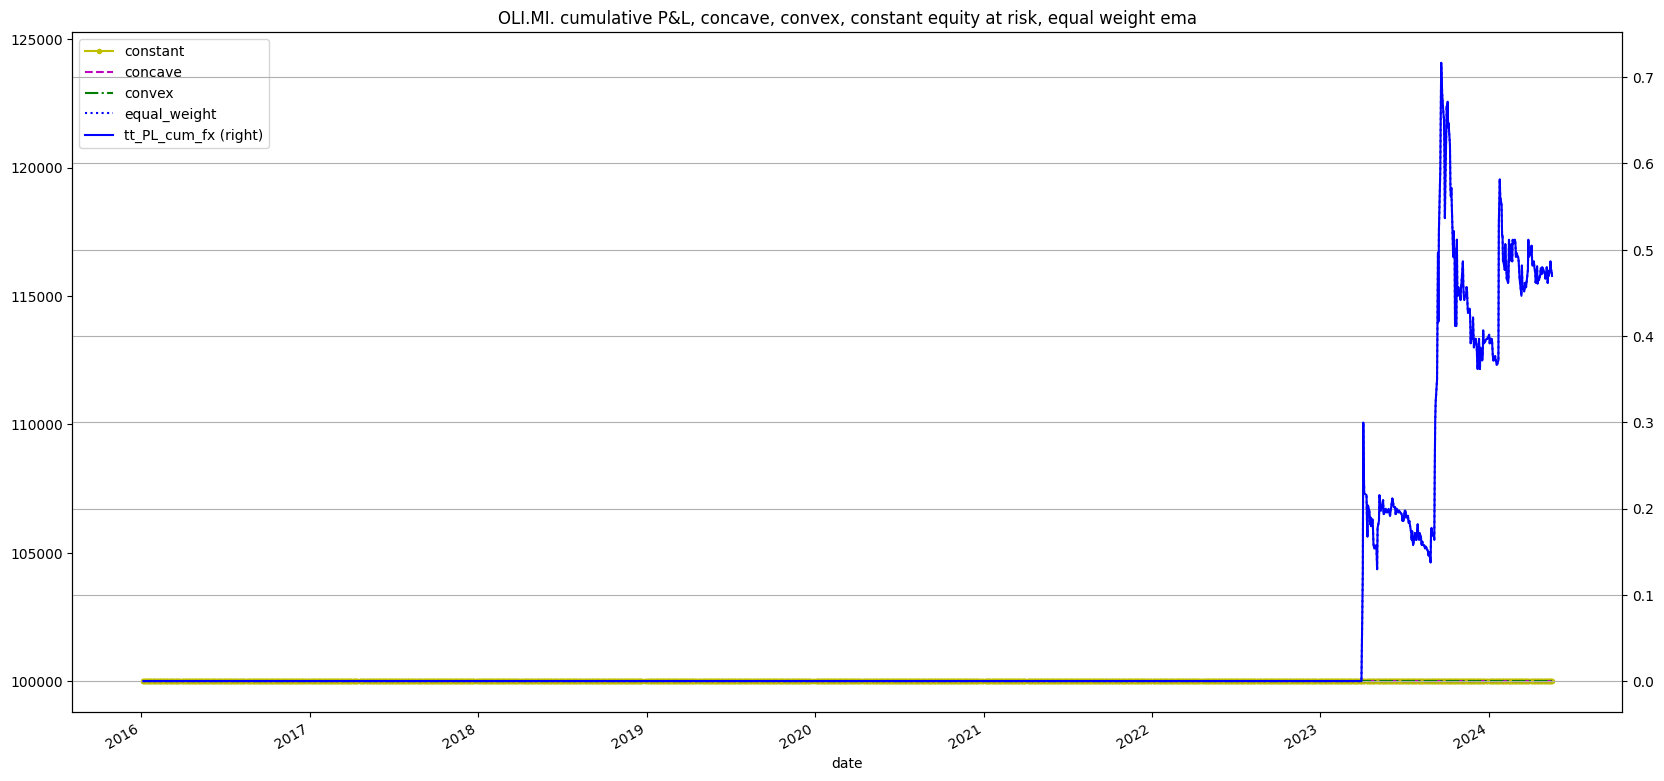

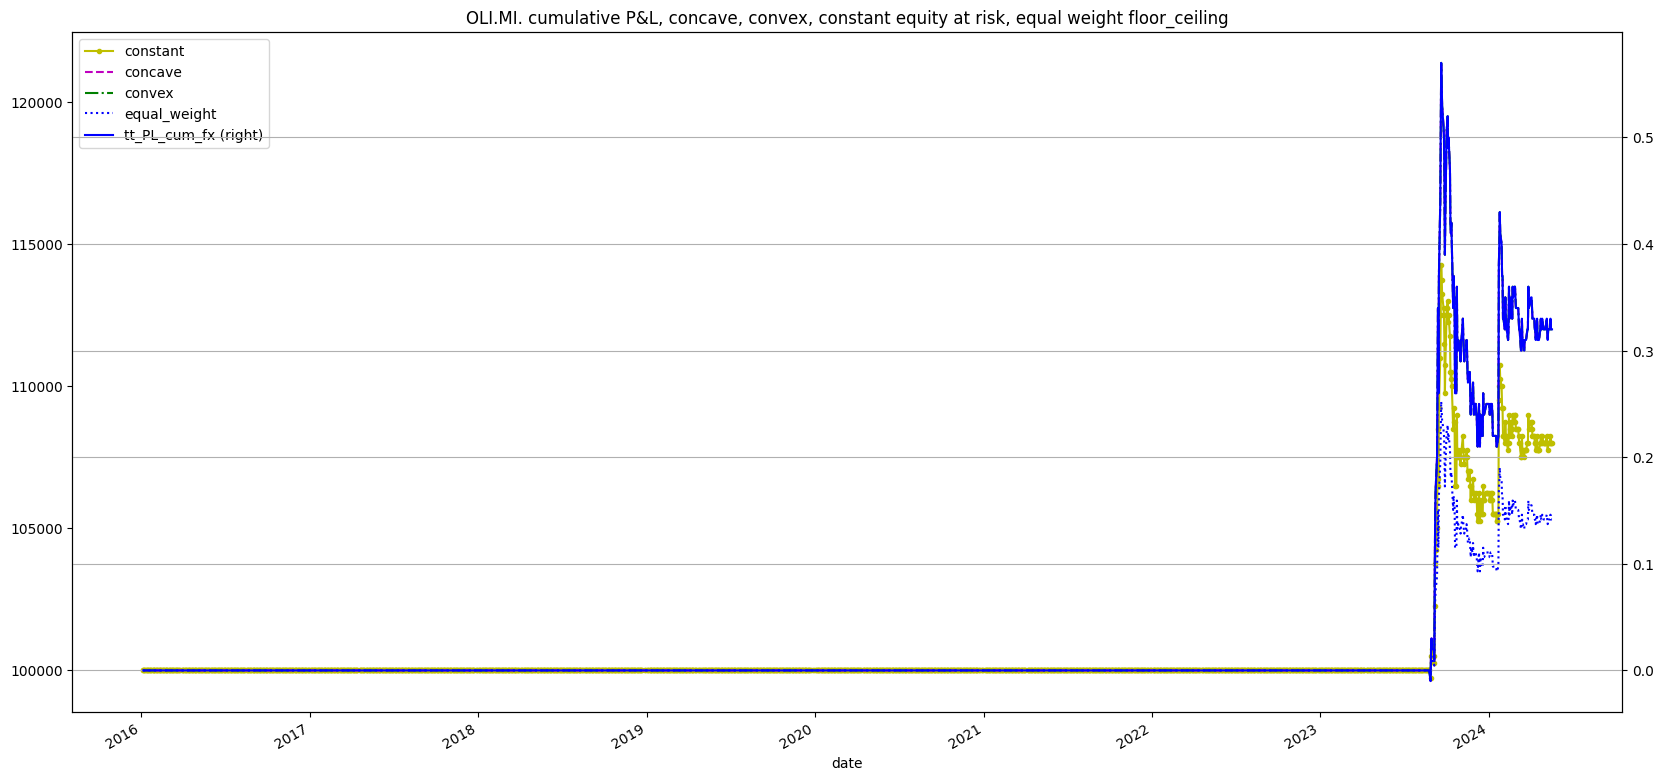

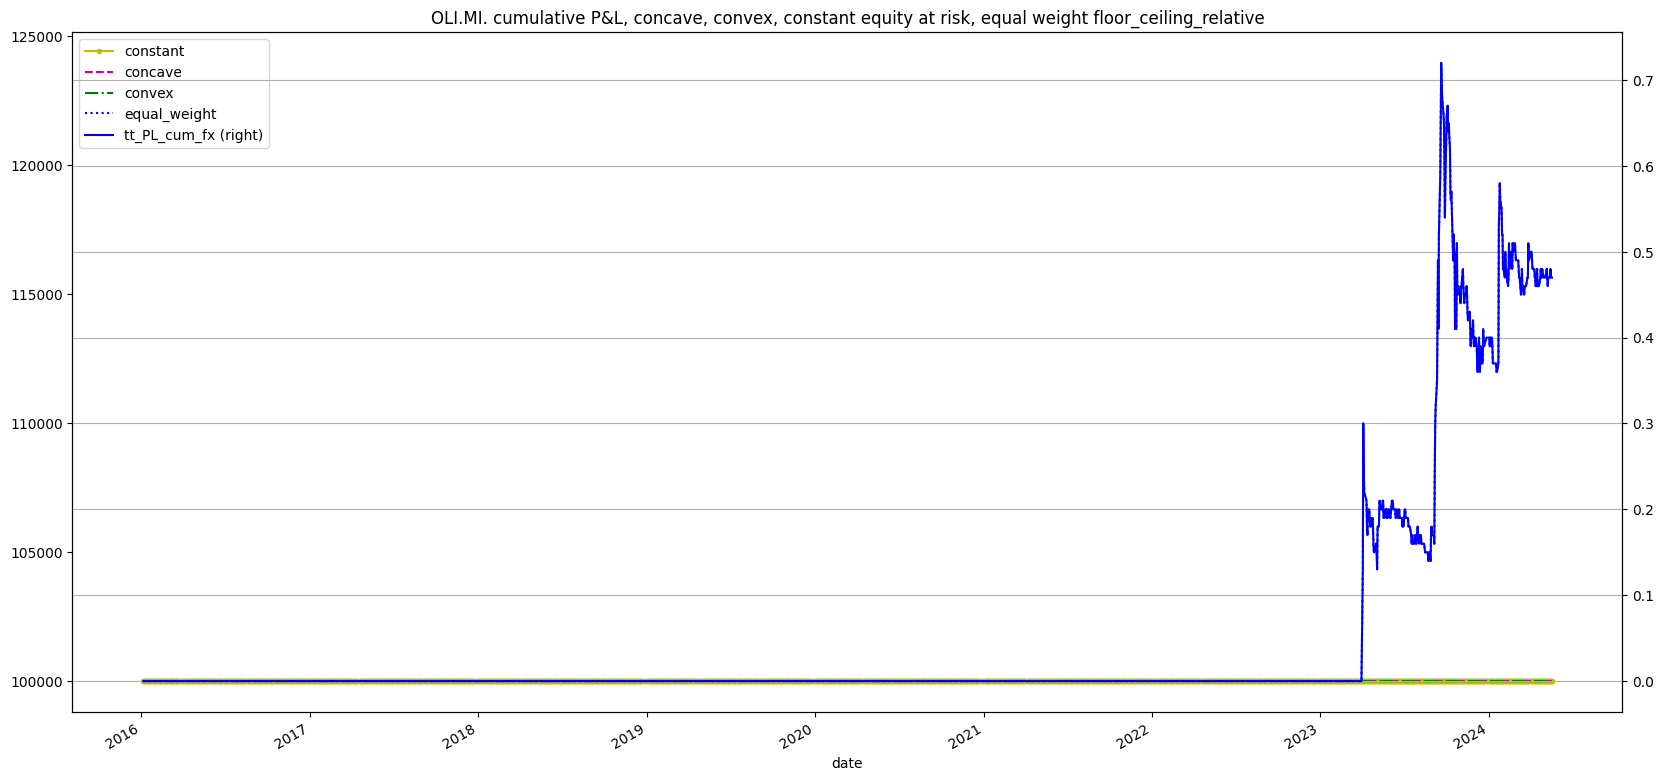

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

,shs_eql,shs_fxd,shs_ccv,shs_cvx
method,,,,
breakout,-9300.0,-0.0,-0.0,-0.0
ema,-9300.0,-0.0,-0.0,-0.0
floor_ceiling,-8400.0,25000.0,37500.0,37500.0
floor_ceiling_relative,-9300.0,-0.0,-0.0,-0.0
sma,-7400.0,3900.0,5800.0,5800.0
turtle,-8400.0,7300.0,11200.0,11100.0


In [25]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'rt', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1', 'rh2', 'rl2',
       'rh3', 'rl3', 'rrt', 'rrg', 'rflr', 'rclg', 'rrg_ch'],
      dtype='object')

In [26]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

,date,clg
1965,2023-09-21 07:00:00,0.92


In [27]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

,date,flr
2022,2023-12-11 08:00:00,0.49


In [28]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

,date,hi3
2053,2024-01-26 08:00:00,0.76


In [29]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

,date,lo3
2084,2024-03-11 08:00:00,0.59


In [30]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [31]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [32]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2126    0.022063
2127    0.022381
2128    0.022540
2129    0.021746
2130    0.020952
Length: 2131, dtype: float64

In [33]:
df_fc.tail()

,date,volume,high,low,open,close,adj_close,ticker,ropen,rhigh,...,rl1,rh2,rl2,rh3,rl3,rrt,rrg,rflr,rclg,rrg_ch
2126,2024-05-13 07:00:00,328390,0.63,0.62,0.62,0.62,0.62,OLI.MI,0.37,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.34
2127,2024-05-14 07:00:00,650755,0.65,0.61,0.63,0.63,0.63,OLI.MI,0.37,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.34
2128,2024-05-15 07:00:00,229139,0.64,0.62,0.63,0.62,0.62,OLI.MI,0.37,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.34
2129,2024-05-16 07:00:00,103418,0.63,0.62,0.62,0.62,0.62,OLI.MI,0.37,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.34
2130,2024-05-17 15:35:12,227010,0.62,0.62,0.62,0.62,0.62,OLI.MI,0.36,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.34
